# Interactive Python using jupyter notebooks

- Notebooks are made of a sequence of cells
- Cells can contain different content such as Python code, or Markdown
- You can change the cell type in the toolbar
- To execute a cell press "Shift+Return"
- Use the tool bar to add, delete, copy, or insert cells

(Note: to learn more about Markdown check [Daring Fireball's website](https://daringfireball.net/projects/markdown/syntax))

## Import the Python package for numerical arrays (numpy)

In [1]:
import numpy as np

## Define a function that creates some statistical data

In [2]:
def load_data():    
    # Goalkeeper, defender, midfielder, attacker
    possible_positions = ['GK', 'D', 'M', 'A']
    N = 100
    positions = []
    heights = []
    for i in range(0,N):
        positions.append(possible_positions[np.random.randint(len(possible_positions))])
        heights.append(np.random.normal(loc=180.0,scale=5.0))
    return positions, heights

## Read the data

In [13]:
positions, heights = load_data()

The objects ```positions``` and ```heights``` are lists as we can check using the Python function ```type```:

In [14]:
print(type(positions))
print(type(heights))

<class 'list'>
<class 'list'>


Question: *How many items are inside the lists ```positions``` and ```heights```?

Hint: Use the Python function ```len```. 

In [15]:
print(len(positions),'items in positions and',len(heights),'items in heights')

100 items in positions and 100 items in heights


## Convert to numpy arrays

In [16]:
np_positions = np.array(positions)
np_heights = np.array(heights)

Question: *what is the data type of ```np_positions``` and ```np_heights```*?<br>
Question: *what is the shape of ```np_positions``` and ```np_heights```*?


Hint: Numpy objects have member functions called ```dtype``` and ```shape```.

In [17]:
print('the data type of positions is',type(np_positions),'and the data type of heights is',type(np_heights))
print('the shape of positions is',np.shape(np_positions),'and the shape of heights is',np.shape(np_heights))
#np.dtype(np_positions)

the data type of positions is <class 'numpy.ndarray'> and the data type of heights is <class 'numpy.ndarray'>
the shape of positions is (100,) and the shape of heights is (100,)


## Extract the heights of the goalkeepers

In [18]:
gk_heights = np_heights[np_positions == 'GK']

## Print the median of the goalkeepers heights

In [19]:
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

Median height of goalkeepers: 179.78484592936064


Question: *what is the median height of all the field players*?<br>
Question: *what is the median height of all the attackers*?<br>
Question: *what is the median height of goalkeepers and the attackers combined?*

In [20]:
allposition_height = np_heights[np_positions != 'GK']
attacker_height = np_heights[np_positions != 'A']
attackerandgk = np.concatenate((gk_heights, attacker_height), axis=0)
print ("median height of all the field player is",np.median(allposition_height))
print ("median height of attacker is",np.median(attacker_height))
print ("median height of goalkeepers and the attackers combinedis",np.median(attackerandgk))

median height of all the field player is 178.34787986257496
median height of attacker is 179.58650910589625
median height of goalkeepers and the attackers combinedis 179.69473453464317


## More statistical tests

Besides the ```median```, numpy als comes with the functions ```mean```, ```std```, ```min``` and ```max``` which are useful for investigating statistical data. 

Question: *Who is the shortest player (which position)*?<br>
Question: *Who is the tallest player (which position)*?

In [21]:
print(np_positions[np.argmin(np_heights)])
print(np_positions[np.argmax(np_heights)])

A
M


## Data plotting

For plotting, we need the package matplotlib

In [22]:
import matplotlib.pyplot as plt

There are different display modes for matplotlib plots inside a jupyter notebook.

In [23]:
# For inline plots use
%matplotlib inline

In [24]:
# For inline plots with interactive capabilities use
%matplotlib notebook

Lets visualize the height distribution of the defenders

In [25]:
d_heights = np_heights[np_positions == 'D']

<IPython.core.display.Javascript object>


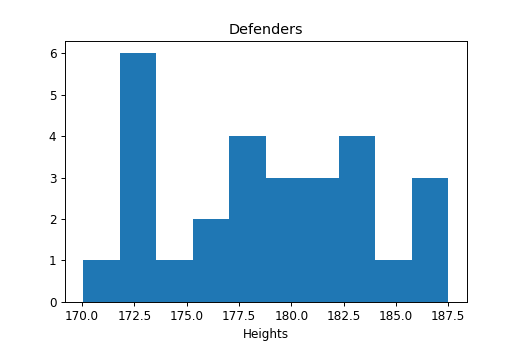

In [26]:
plt.figure()
plt.hist(d_heights)
plt.title('Defenders')
plt.xlabel('Heights')
plt.show()

To figure out the tallest/shortest player, we can the max/min within each position

In [27]:
p = ['GK', 'D', 'M', 'A']
p_max = [np_heights[np_positions == i].max() for i in p]

<IPython.core.display.Javascript object>


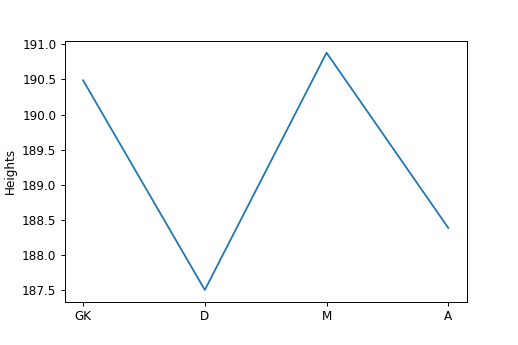

In [28]:
plt.figure()
plt.plot(range(len(p)), p_max)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()

For inspiration on data plotting and more examples, check out the matplotlib gallery: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)

<IPython.core.display.Javascript object>


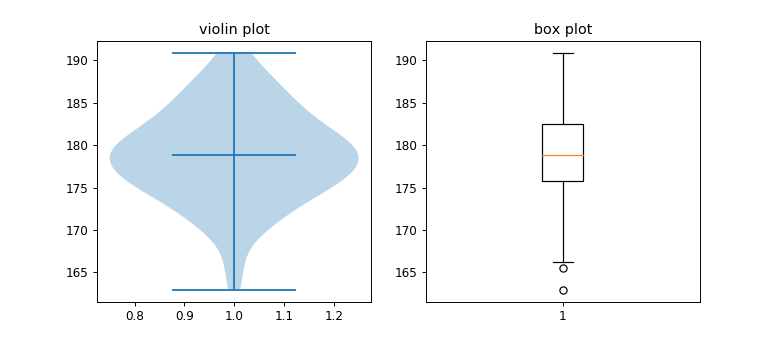

Text(0.5, 1.0, 'box plot')

In [30]:
#try violin plot vs box plot of the player heights. inspired from https://matplotlib.org/gallery.html
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].violinplot(np_heights,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(np_heights)
axes[1].set_title('box plot')